In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.cluster import KMeans   #<---- We will use sci-kit learns implementation of K-means
import plotly
plotly.offline.init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
# df = pd.read_csv('../../data/banking_transactions_output_data/scaled_df.csv')
df = pd.read_csv('scaled_df.csv')
df.head()

,creditSpendtoLimitRatio,averageMonthlySpending,numTnxMonthlyAverage,hasSavings,hasCredit,hasChecking,incomeToSavingsRanking
0,0.515942,0.469712,0.000000,0.5,0.5,0.5,0.50
1,0.491933,0.432230,0.043771,1.0,1.0,1.0,0.75
2,0.532281,0.469712,0.000000,1.0,1.0,0.5,0.25
3,0.619416,0.456556,0.078283,1.0,1.0,1.0,0.25
4,0.605490,0.308527,0.090909,1.0,1.0,1.0,0.25


# K clustering

## Elbow method

In [ ]:
#elbow method
inertias = []
K = range(1,11) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    inertias.append(kmeanModel.inertia_)
    
# plot elbow method
plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal K')
plt.show()

## Silhouette method

In [ ]:
from sklearn.metrics import silhouette_score
silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    label=kmeanModel.predict(df)
    silhouettes.append(silhouette_score(df,label))
    
# plot silhouette
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

In [ ]:
# fitting with the optimum n_clusters

kmeanModel = KMeans(n_clusters=4).fit(df)
centroids = kmeanModel.cluster_centers_

## Visualize with Radial plot

In [18]:
import plotly.graph_objects as go

parameters = list(df.columns)
parameters

['creditSpendtoLimitRatio',
 'averageMonthlySpending',
 'numTnxMonthlyAverage',
 'hasSavings',
 'hasCredit',
 'hasChecking',
 'incomeToSavingsRanking']

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=centroids[0],
      theta=parameters,
      fill='toself',
      name='Cluster 1'
))
fig.add_trace(go.Scatterpolar(
      r=centroids[1],
      theta=parameters,
      fill='toself',
      name='Cluster 2'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=False
)

fig.show()

# Hierarchical Clustering

In [4]:
# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# cluster hierarchy
import scipy.cluster.hierarchy as sch

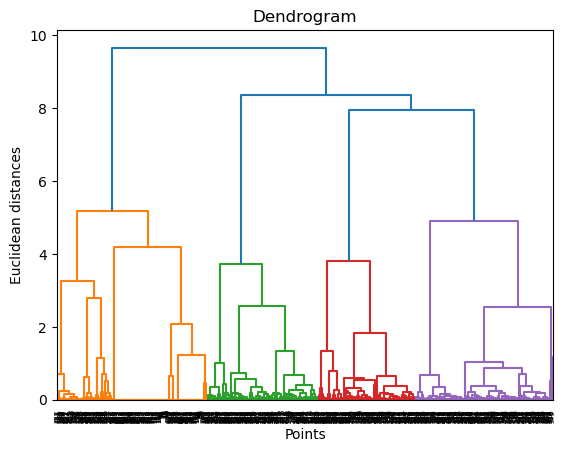

In [5]:
X = df
# define plot_dendrogram function
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()
    
plot_dendrogram(X)

**Note**:  These are clearly 4 clusters

In [21]:
# create an object
ac = AgglomerativeClustering(metric='euclidean',
                             linkage='ward',
                             n_clusters = 4) # from K clusters
acModel = ac.fit_predict(df)

# PCA for visualization

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
df_pca = pca.fit(df)
df_pca

PCA()

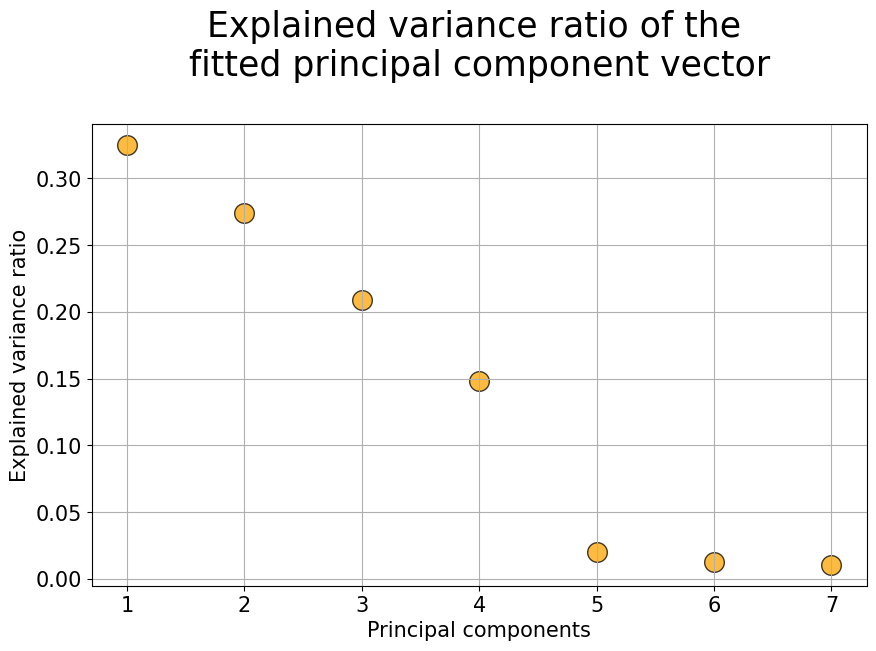

In [7]:
# Expanded variance ratio

plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(df_pca.explained_variance_ratio_))],
            y=df_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(df_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

**Note**: Looks like the first 4 principal components are significant. Well I can only plot a 2D image with the first 2. :()

## Visualizing class separation with PCA

In [10]:
# applying K-clusters method to the PCA 
labels = ac.fit_predict(pca.transform(df))

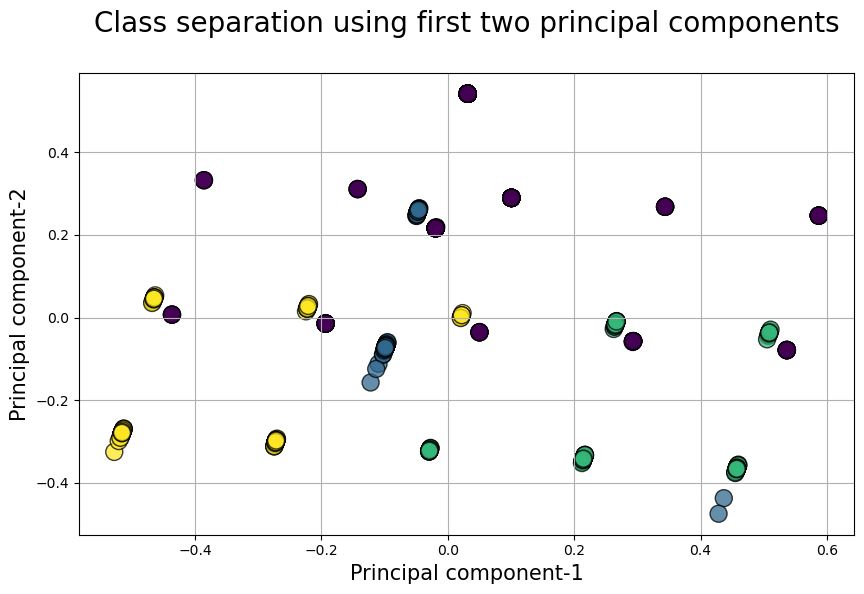

In [17]:
# plot the scatter diagram

df_trans = pca.transform(df)
df_trans = pd.DataFrame(data=df_trans)

plt.figure(figsize=(10,6))
plt.scatter(df_trans[1],df_trans[0],c=labels,edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()
